In [1]:
from datasets import load_dataset

# Use cudf
# %load_ext cudf.pandas
# %reload_ext cudf.pandas

# Check LD_LIBRARY_PATH
import os
print(os.environ.get('LD_LIBRARY_PATH'))

/usr/lib/wsl/lib/


In [2]:
meta_dataset = load_dataset("McAuley-Lab/Amazon-Reviews-2023", "raw_meta_Books", trust_remote_code=True)
review_dataset = load_dataset("McAuley-Lab/Amazon-Reviews-2023", "raw_review_Books", trust_remote_code=True)

In [3]:
meta_dataset["full"]

Dataset({
    features: ['main_category', 'title', 'average_rating', 'rating_number', 'features', 'description', 'price', 'images', 'videos', 'store', 'categories', 'details', 'parent_asin', 'bought_together', 'subtitle', 'author'],
    num_rows: 137269
})

In [4]:
review_dataset["full"]

Dataset({
    features: ['rating', 'title', 'text', 'images', 'asin', 'parent_asin', 'user_id', 'timestamp', 'helpful_vote', 'verified_purchase'],
    num_rows: 4624615
})

In [5]:
# Coverting the dataset to pandas dataframe
import pandas as pd

df_meta = pd.DataFrame(meta_dataset["full"])
df_review = pd.DataFrame(review_dataset['full'])

In [6]:
df_meta.head()

,main_category,title,average_rating,rating_number,features,description,price,images,videos,store,categories,details,parent_asin,bought_together,subtitle,author
0,Video Games,Dash 8-300 Professional Add-On,5.0,1,[Features Dash 8-300 and 8-Q300 ('Q' rollout l...,[The Dash 8-300 Professional Add-On lets you p...,None,"{'hi_res': [None], 'large': ['https://m.media-...","{'title': [], 'url': [], 'user_id': []}",Aerosoft,"[Video Games, PC, Games]","{""Pricing"": ""The strikethrough price is the Li...",B000FH0MHO,None,None,None
1,Video Games,Phantasmagoria: A Puzzle of Flesh,4.1,18,[Windows 95],[],None,{'hi_res': ['https://m.media-amazon.com/images...,"{'title': [], 'url': [], 'user_id': []}",Sierra,"[Video Games, PC, Games]","{""Best Sellers Rank"": {""Video Games"": 137612, ...",B00069EVOG,None,None,None
2,Video Games,NBA 2K17 - Early Tip Off Edition - PlayStation 4,4.3,223,[The #1 rated NBA video game simulation series...,[Following the record-breaking launch of NBA 2...,58.0,{'hi_res': ['https://m.media-amazon.com/images...,{'title': ['NBA 2K17 - Kobe: Haters vs Players...,2K,"[Video Games, PlayStation 4, Games]","{""Release date"": ""September 16, 2016"", ""Best S...",B00Z9TLVK0,None,None,None
3,Video Games,Nintendo Selects: The Legend of Zelda Ocarina ...,4.9,22,[Authentic Nintendo Selects: The Legend of Zel...,[],37.42,{'hi_res': ['https://m.media-amazon.com/images...,"{'title': [], 'url': [], 'user_id': []}",Amazon Renewed,"[Video Games, Legacy Systems, Nintendo Systems...","{""Best Sellers Rank"": {""Video Games"": 51019, ""...",B07SZJZV88,None,None,None
4,Video Games,Thrustmaster Elite Fitness Pack for Nintendo Wii,3.0,3,"[Includes (9) Total Accessories, Pedometer, Wi...",[The Thrustmaster Motion Plus Elite Fitness Pa...,None,"{'hi_res': [None, None, None, None, None, None...","{'title': [], 'url': [], 'user_id': []}",THRUSTMASTER,"[Video Games, Legacy Systems, Nintendo Systems...","{""Release date"": ""November 1, 2009"", ""Pricing""...",B002WH4ZJG,None,None,None


In [7]:
df_review.head()

,rating,title,text,images,asin,parent_asin,user_id,timestamp,helpful_vote,verified_purchase
0,4.0,It’s pretty sexual. Not my fav,I’m playing on ps5 and it’s interesting. It’s...,[],B07DJWBYKP,B07DK1H3H5,AGCI7FAH4GL5FI65HYLKWTMFZ2CQ,1608186804795,0,True
1,5.0,Good. A bit slow,Nostalgic fun. A bit slow. I hope they don’t...,[],B00ZS80PC2,B07SRWRH5D,AGCI7FAH4GL5FI65HYLKWTMFZ2CQ,1587051114941,1,False
2,5.0,... an order for my kids & they have really en...,This was an order for my kids & they have real...,[],B01FEHJYUU,B07MFMFW34,AGXVBIUFLFGMVLATYXHJYL4A5Q7Q,1490877431000,0,True
3,5.0,Great alt to pro controller,"These work great, They use batteries which is ...",[],B07GXJHRVK,B0BCHWZX95,AFTC6ZR5IKNRDG5JCPVNVMU3XV2Q,1577637634017,0,True
4,5.0,solid product,I would recommend to anyone looking to add jus...,[],B00HUWA45W,B00HUWA45W,AFTC6ZR5IKNRDG5JCPVNVMU3XV2Q,1427591932000,0,True


In [8]:
# Save 1000 rows of the dataset to a csv file
df_meta[:100].to_csv('raw_meta_Video_Games.csv', index=False)
df_review[:100].to_csv('raw_review_Video_Games.csv', index=False)

In [9]:
df_review_bk = df_meta
df_meta_bk = df_review 

In [10]:
# # Convert timestamp to datetime
# df_review['timestamp'] = pd.to_datetime(df_review['timestamp'], unit='ms')

# # Summary statistics for numeric columns in df_meta
# meta_numeric_summary = df_meta.describe()

# # Summary statistics for numeric columns in df_review
# reviews_numeric_summary = df_review.describe()

# # Summary statistics for categorical columns in df_meta
# meta_categorical_summary = df_meta.describe(include=['O'])

# # Summary statistics for categorical columns in df_review
# reviews_categorical_summary = df_review.describe(include=['O'])

# # Checking the distribution of null values in df_meta
# meta_null_distribution = df_meta.isnull().sum()

# # Checking the distribution of null values in df_review
# reviews_null_distribution = df_review.isnull().sum()

# (meta_numeric_summary, meta_categorical_summary, meta_null_distribution,
#  reviews_numeric_summary, reviews_categorical_summary, reviews_null_distribution)  

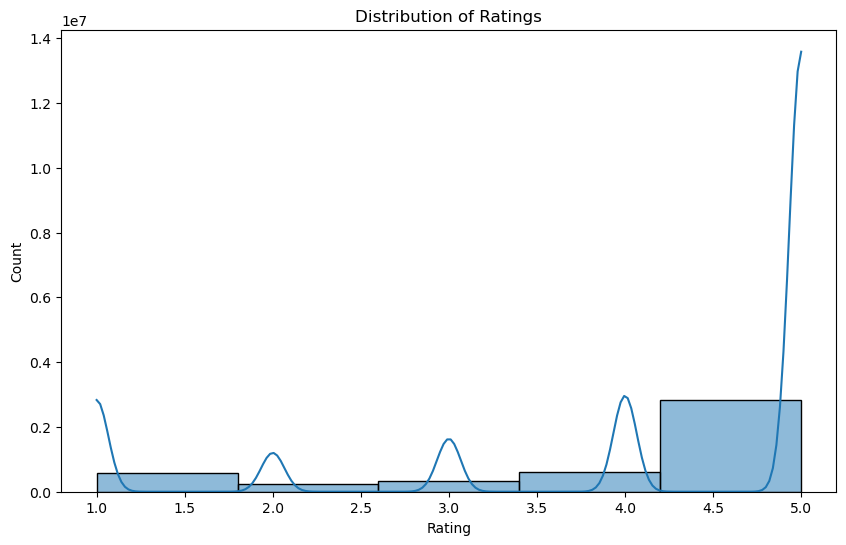

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of ratings
plt.figure(figsize=(10, 6))
sns.histplot(df_review['rating'], bins=5, kde=False, color='blue')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

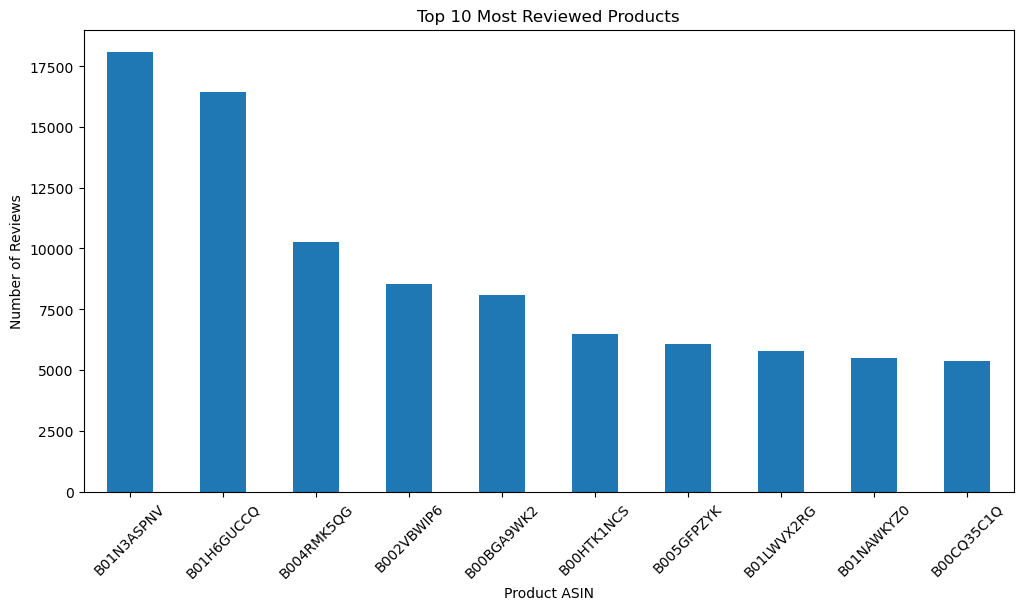

In [12]:
import pandas as pd
import numpy as np
from datetime import datetime


# Top 10 most reviewed products
top_reviewed = df_review['asin'].value_counts().head(10)
plt.figure(figsize=(12, 6))
top_reviewed.plot(kind='bar')
plt.title('Top 10 Most Reviewed Products')
plt.xlabel('Product ASIN')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=45)
plt.show()


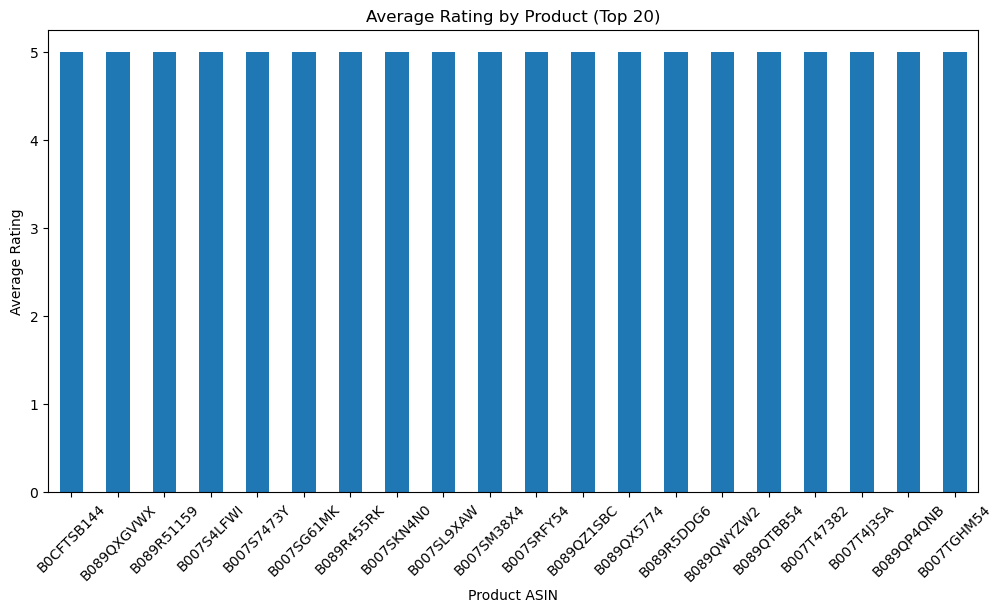

In [13]:
# Average rating by product
avg_rating = df_review.groupby('asin')['rating'].mean().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
avg_rating.head(20).plot(kind='bar')
plt.title('Average Rating by Product (Top 20)')
plt.xlabel('Product ASIN')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.show()


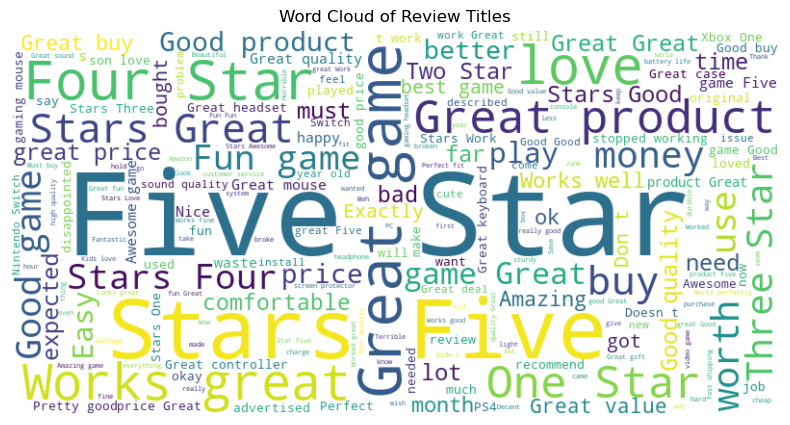

In [14]:
# Word cloud of review titles (you may need to install wordcloud: pip install wordcloud)
from wordcloud import WordCloud

all_titles = ' '.join(df_review['title'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_titles)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Review Titles')
plt.show()

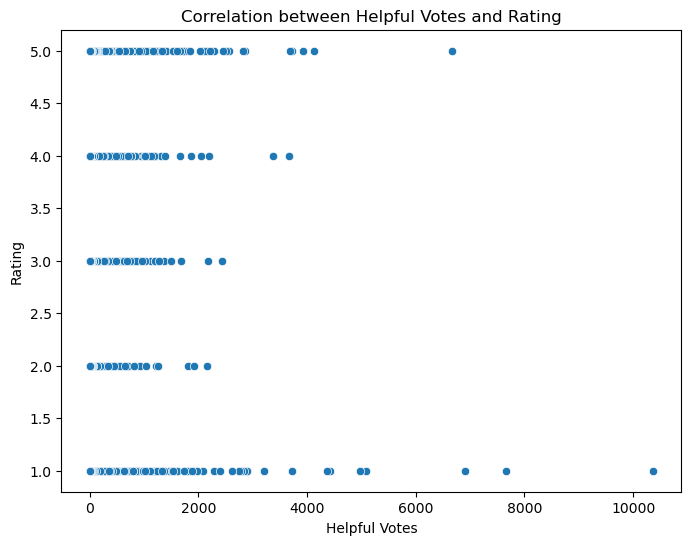

In [15]:
# Correlation between helpful votes and rating
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_review, x='helpful_vote', y='rating')
plt.title('Correlation between Helpful Votes and Rating')
plt.xlabel('Helpful Votes')
plt.ylabel('Rating')
plt.show()

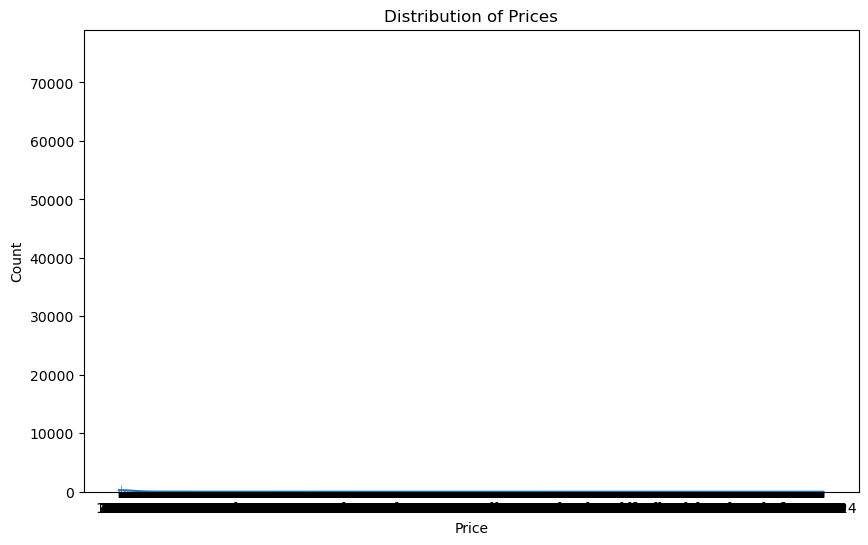

In [16]:
# Distribution of prices (for non-null prices)
price_data = df_meta[df_meta['price'].notnull()]
plt.figure(figsize=(10, 6))
sns.histplot(price_data['price'], bins=30, kde=True)
plt.title('Distribution of Prices')
plt.xlabel('Price')
plt.ylabel('Count')
plt.show()

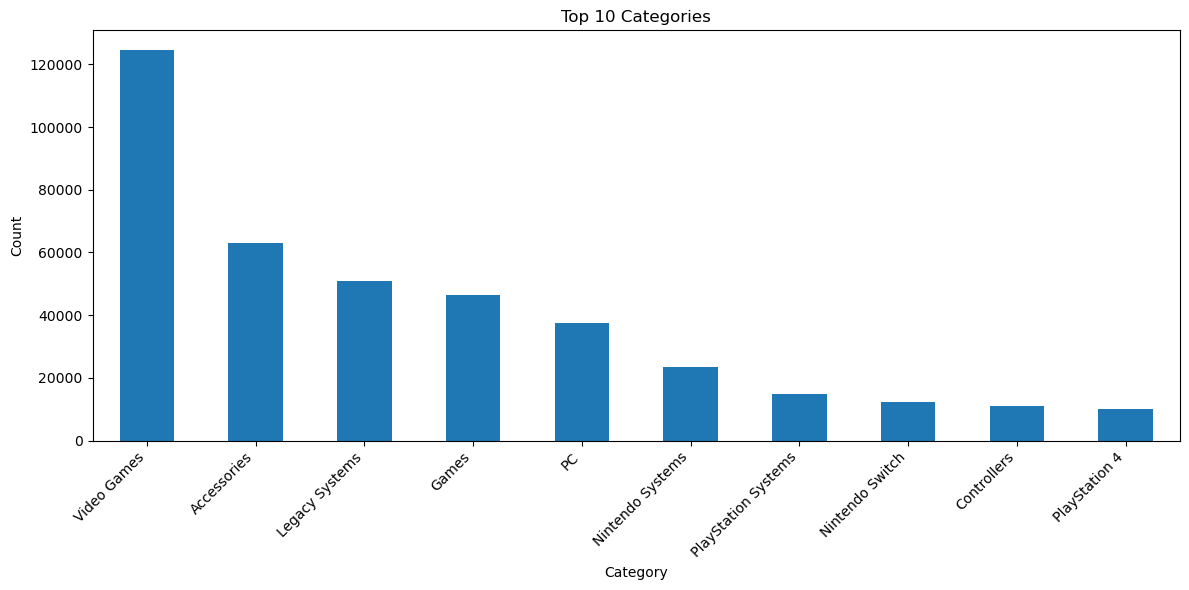

In [17]:
# Top 10 categories
categories = df_meta['categories'].explode()
top_categories = categories.value_counts().head(10)
plt.figure(figsize=(12, 6))
top_categories.plot(kind='bar')
plt.title('Top 10 Categories')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

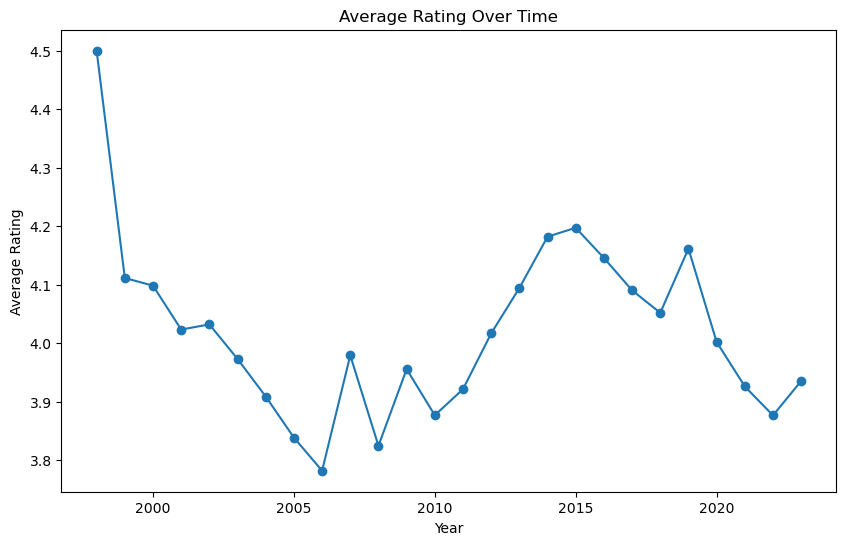

In [18]:
# Review sentiment over time
df_review['timestamp'] = pd.to_datetime(df_review['timestamp'], unit='ms')
df_review['year'] = df_review['timestamp'].dt.year
yearly_sentiment = df_review.groupby('year')['rating'].mean()
plt.figure(figsize=(10, 6))
yearly_sentiment.plot(kind='line', marker='o')
plt.title('Average Rating Over Time')
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.show()

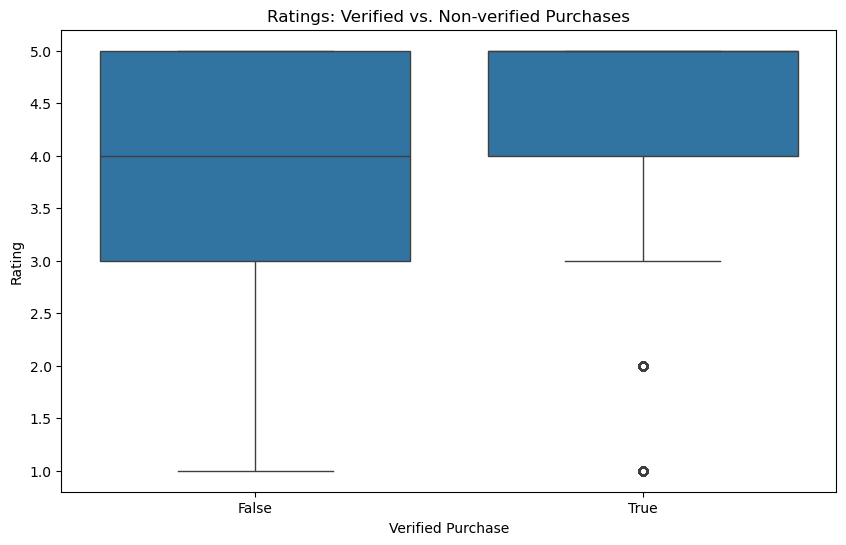

In [19]:
# Verified vs. Non-verified Purchase Ratings
plt.figure(figsize=(10, 6))
sns.boxplot(x='verified_purchase', y='rating', data=df_review)
plt.title('Ratings: Verified vs. Non-verified Purchases')
plt.xlabel('Verified Purchase')
plt.ylabel('Rating')
plt.show()

/tmp/ipykernel_717869/2770341562.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  meta_df_cleaned['main_category'].fillna(meta_df_cleaned['main_category'].mode()[0], inplace=True)
/tmp/ipykernel_717869/2770341562.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, w

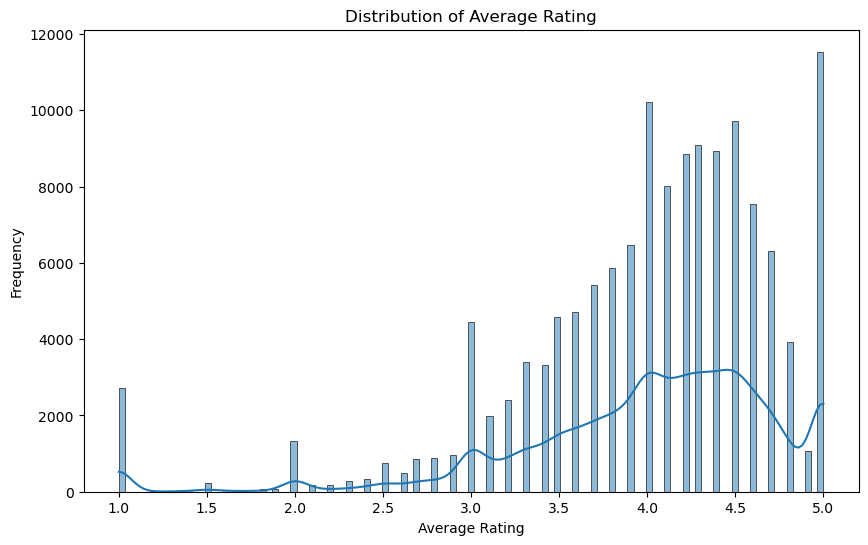

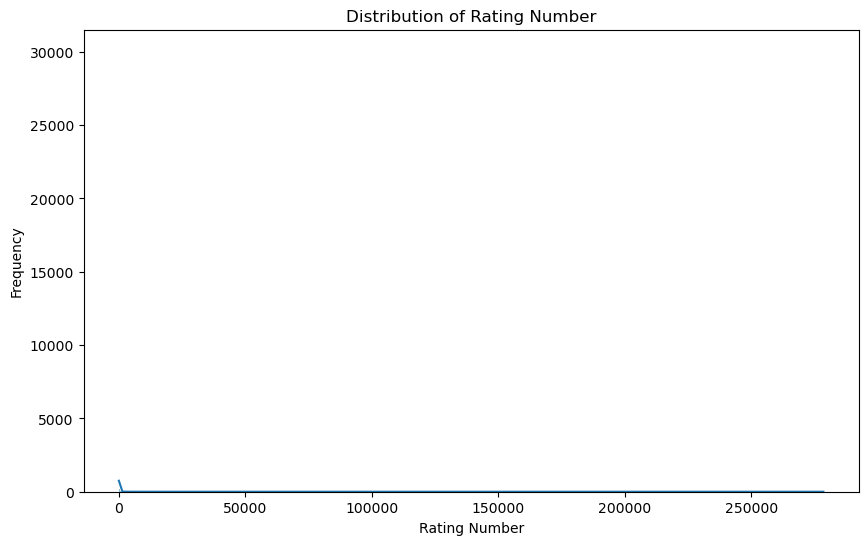

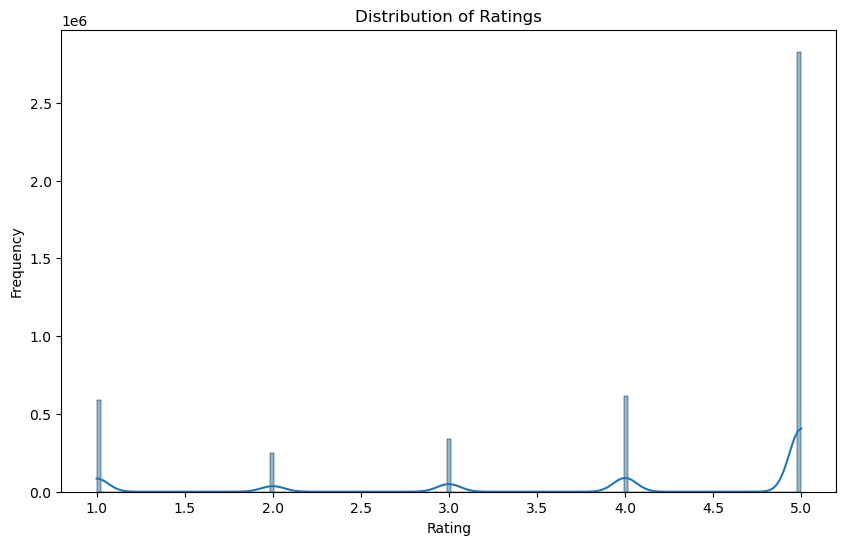

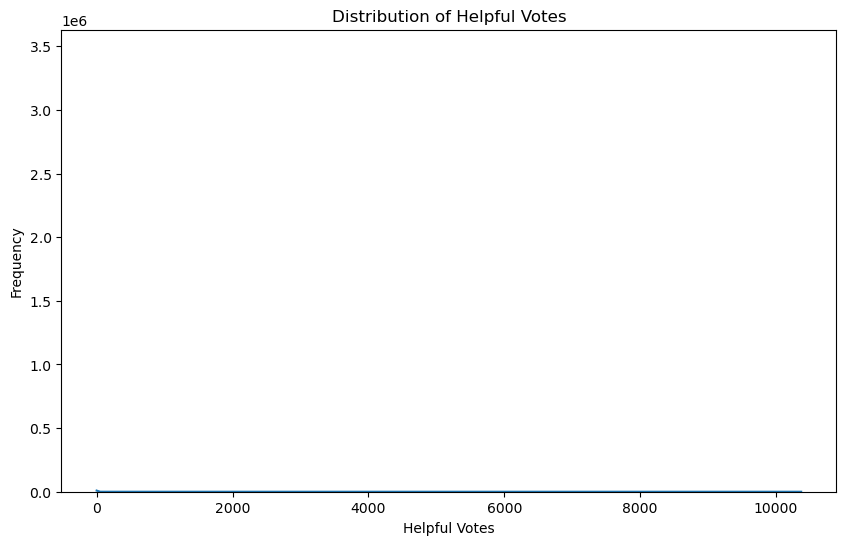

: 

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Remove columns with entirely missing values
meta_df_cleaned = df_meta.drop(columns=['bought_together', 'subtitle', 'author'])

# Impute missing values for 'main_category' and 'store' with the mode
meta_df_cleaned['main_category'].fillna(meta_df_cleaned['main_category'].mode()[0], inplace=True)
meta_df_cleaned['store'].fillna(meta_df_cleaned['store'].mode()[0], inplace=True)

# Function to plot distributions of numeric variables
def plot_distribution(df, column, title, xlabel, ylabel):
    plt.figure(figsize=(10, 6))
    sns.histplot(df[column], kde=True)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

# Plot distributions for meta_df
plot_distribution(meta_df_cleaned, 'average_rating', 'Distribution of Average Rating', 'Average Rating', 'Frequency')
plot_distribution(meta_df_cleaned, 'rating_number', 'Distribution of Rating Number', 'Rating Number', 'Frequency')

# Plot distributions for df_review
plot_distribution(df_review, 'rating', 'Distribution of Ratings', 'Rating', 'Frequency')
plot_distribution(df_review, 'helpful_vote', 'Distribution of Helpful Votes', 'Helpful Votes', 'Frequency')


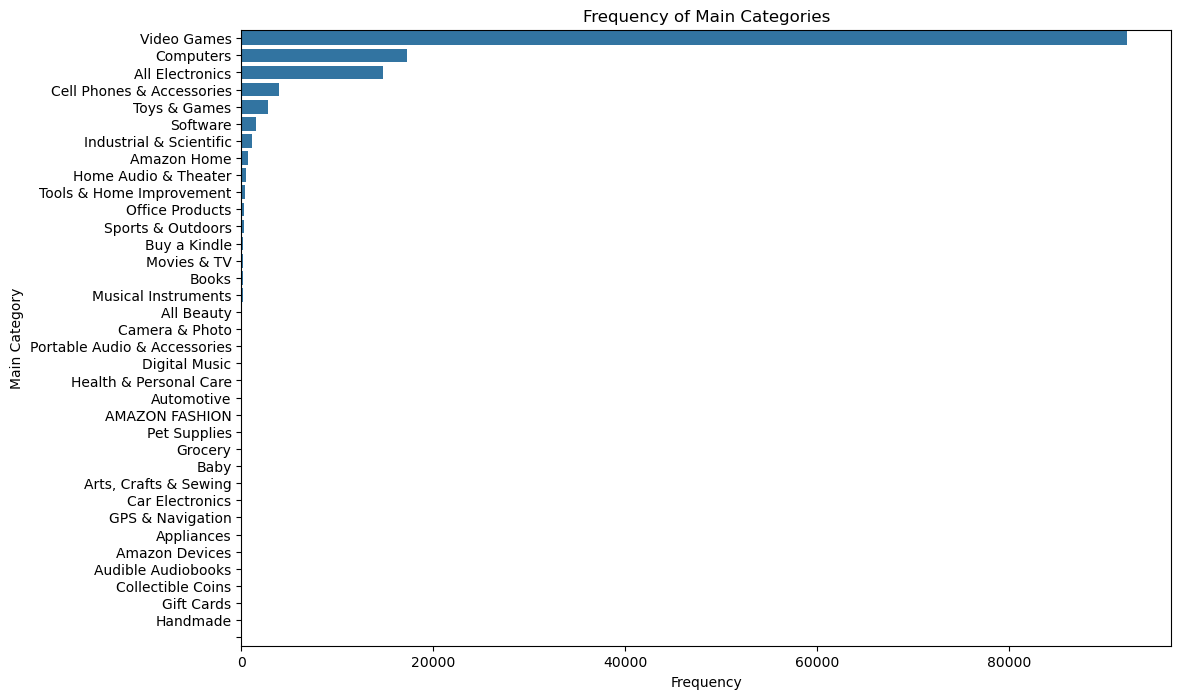

In [21]:
# Function to plot bar charts for categorical variables
def plot_bar_chart(df, column, title, xlabel, ylabel):
    plt.figure(figsize=(12, 8))
    sns.countplot(y=df[column], order=df[column].value_counts().index)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

# Plot bar charts for key categorical variables in meta_df
plot_bar_chart(meta_df_cleaned, 'main_category', 'Frequency of Main Categories', 'Frequency', 'Main Category')
plot_bar_chart(meta_df_cleaned, 'store', 'Frequency of Stores', 'Frequency', 'Store')

/home/kchauhan/miniconda3/envs/rapids-24.06/lib/python3.11/site-packages/cudf/core/resample.py:189: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  offset = pd.tseries.frequencies.to_offset(freq)
/home/kchauhan/miniconda3/envs/rapids-24.06/lib/python3.11/site-packages/cudf/core/tools/datetimes.py:907: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  offset = pd.tseries.frequencies.to_offset(freq)
/home/kchauhan/miniconda3/envs/rapids-24.06/lib/python3.11/site-packages/cudf/pandas/fast_slow_proxy.py:30: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return fn(*args, **kwargs)


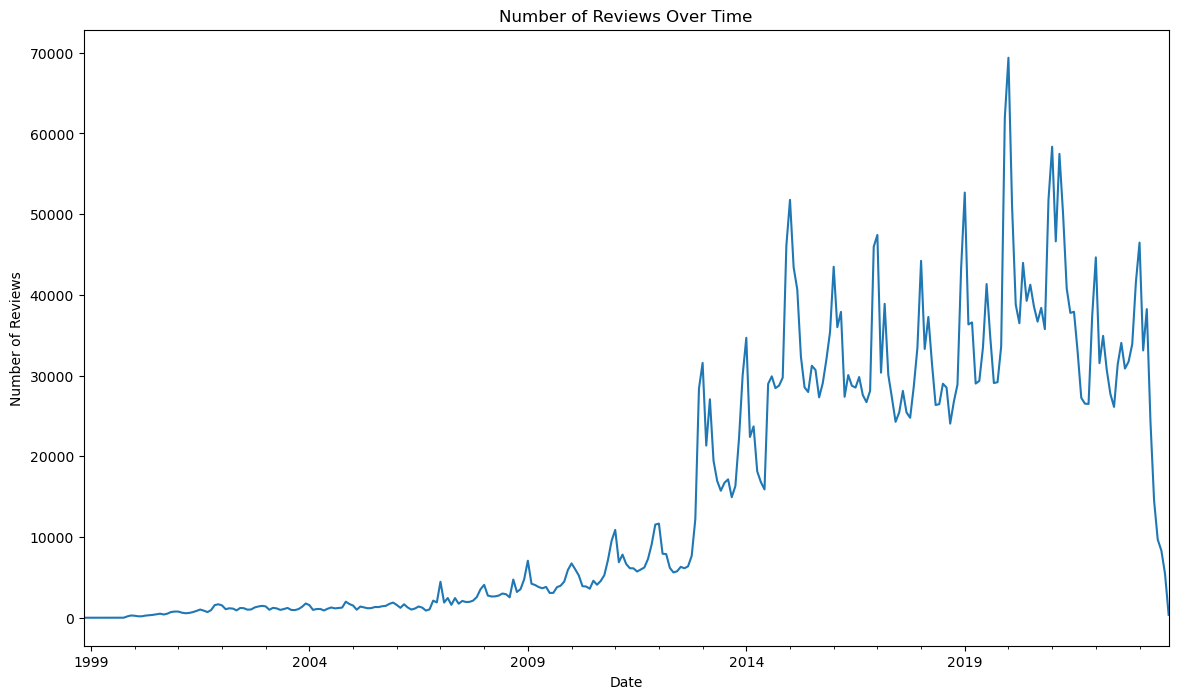

In [ ]:
# Convert timestamp to datetime
df_review['timestamp'] = pd.to_datetime(df_review['timestamp'], unit='ms')

# Plot the number of reviews over time
plt.figure(figsize=(14, 8))
df_review.set_index('timestamp').resample('M').size().plot()
plt.title('Number of Reviews Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Reviews')
plt.show()

In [ ]:
# Merge reviews_df with meta_df_cleaned on 'parent_asin'
merged_df = pd.merge(df_review, meta_df_cleaned, left_on='parent_asin', right_on='parent_asin')

# Display the first few rows of the merged dataframe
print(merged_df.head())

In [ ]:
# Compute the correlation matrix
correlation_matrix = merged_df[['average_rating', 'rating_number', 'rating', 'helpful_vote']].corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()